Import

In [75]:
import pandas as pd
import numpy as np
from scipy import stats
from math import sqrt
from sklearn.model_selection import cross_val_score,train_test_split,cross_val_predict,cross_validate,KFold
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,make_scorer
from sklearn.inspection import permutation_importance
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [216]:
train = pd.read_csv("train.csv")
test =  pd.read_csv("test.csv")
gender= pd.read_csv("gender_submission.csv")

Looking at what I will work with 

In [131]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [133]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Explore the data

In [134]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [136]:
train["Name"].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

Finding all the families in the titanic

In [137]:
names = []
for val in train["Name"]:
    names.append(val.split(",")[0])
names = sorted(names)
families= []
for index,val in enumerate(names):
    if index+1 >= len(names):
        break
    if names[index]== names[index+1]:
        if val not in families:
            families.append(val)
print(families)     


['Abbott', 'Abelson', 'Ali', 'Allen', 'Allison', 'Andersson', 'Andrews', 'Arnold-Franchi', 'Asplund', 'Attalah', 'Backstrom', 'Baclini', 'Barbara', 'Baxter', 'Beane', 'Becker', 'Beckwith', 'Bishop', 'Boulos', 'Bourke', 'Braund', 'Brown', 'Cacic', 'Caldwell', 'Calic', 'Carlsson', 'Carter', 'Chambers', 'Chapman', 'Coleff', 'Collyer', 'Coutts', 'Crosby', 'Daly', 'Danbom', 'Davies', 'Dean', 'Dick', 'Doling', 'Duff Gordon', 'Elias', 'Flynn', 'Ford', 'Fortune', 'Frauenthal', 'Futrelle', 'Goldenberg', 'Goldsmith', 'Goodwin', 'Graham', 'Gustafsson', 'Hagland', 'Hakkarainen', 'Hamalainen', 'Hansen', 'Harper', 'Harris', 'Hart', 'Hays', 'Herman', 'Hickman', 'Hippach', 'Hocking', 'Holverson', 'Hoyt', 'Jacobsohn', 'Jensen', 'Johansson', 'Johnson', 'Johnston', 'Jussila', 'Kantor', 'Keane', 'Kelly', 'Lam', 'Laroche', 'Larsson', 'Lefebre', 'Lobb', 'Mallet', 'McCoy', 'Mellinger', 'Meyer', 'Minahan', 'Moor', 'Moran', 'Morley', 'Moubarek', 'Murphy', 'Nakid', 'Nasser', 'Navratil', 'Newell', 'Nicola-Yarred

In [138]:
train.sort_values("Name",inplace=True)
train.reset_index(inplace=True,drop=True)
print(train.head())

   PassengerId  Survived  Pclass                                   Name  \
0          846         0       3                    Abbing, Mr. Anthony   
1          747         0       3            Abbott, Mr. Rossmore Edward   
2          280         1       3       Abbott, Mrs. Stanton (Rosa Hunt)   
3          309         0       2                    Abelson, Mr. Samuel   
4          875         1       2  Abelson, Mrs. Samuel (Hannah Wizosky)   

      Sex   Age  SibSp  Parch     Ticket   Fare Cabin Embarked  
0    male  42.0      0      0  C.A. 5547   7.55   NaN        S  
1    male  16.0      1      1  C.A. 2673  20.25   NaN        S  
2  female  35.0      1      1  C.A. 2673  20.25   NaN        S  
3    male  30.0      1      0  P/PP 3381  24.00   NaN        C  
4  female  28.0      1      0  P/PP 3381  24.00   NaN        C  


Trying to Fill the missing values by finding families

In [139]:
for index in range(len(train)):
    if index+1 >= len(train):
        break
    if train["Name"][index] == train["Name"][index+1]:
        train["Cabin"][index+1] =train["Cabin"][index]
        train["Age"][index+1] =train["Age"][index]
        train["Embarked"][index+1] =train["Embarked"][index]

No success 

In [219]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Visualization of relationships between target and variables

<AxesSubplot:xlabel='Survived', ylabel='Age'>

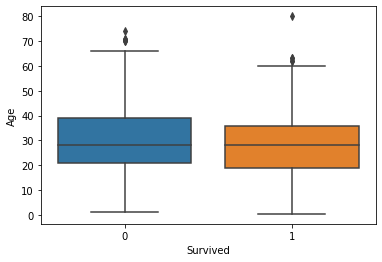

In [141]:
sns.boxplot(data = train, y="Age", x="Survived")

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

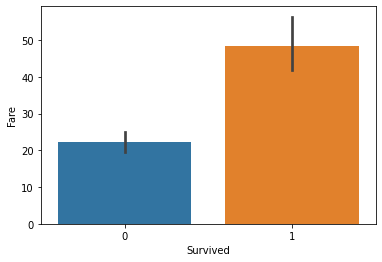

In [142]:
sns.barplot(data = train, x="Survived", y="Fare")

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

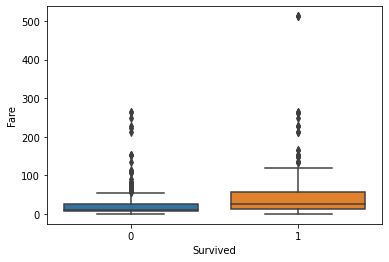

In [143]:
sns.boxplot(data = train, y="Fare", x="Survived")

Feature Engineering and data cleaning

In [220]:
cat_variables = train[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()
train = train.drop(['Sex', 'Embarked'], axis=1)
train = pd.concat([train, cat_dummies], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [221]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Sex_male     891 non-null    uint8  
 11  Embarked_Q   891 non-null    uint8  
 12  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(3)
memory usage: 72.3+ KB


In [222]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [223]:
test['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [224]:
for col in train.columns:
    if train[col].dtype == "uint8":
        train[col]=train[col].astype("int64")

In [225]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Sex_male     891 non-null    int64  
 11  Embarked_Q   891 non-null    int64  
 12  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


In [226]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

train = train.select_dtypes(include=numerics)

Filling the null values with KNNImputer

In [151]:
imputer = KNNImputer(n_neighbors=5)
df_train = pd.DataFrame(imputer.fit_transform(train),columns = train.columns)

In [152]:
for col in df_train.columns:
    if df_train[col].isna().sum()!= 0 :
        print(col)

Data split to train and test because we have unseen test set in csv file we just need to split it to trainset and testset(valset)

In [153]:
y = df_train["Survived"]
X = df_train.drop("Survived", axis =1)

In [154]:
x_train, x_test,y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

testing all the options

In [159]:
models = {
    "LG": LogisticRegression(),
    "SVM": svm.SVC(),
    "DTC": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(), 
    "ET":ExtraTreesClassifier(),
    "AB":AdaBoostClassifier(),
    "GBC":GradientBoostingClassifier()
}

In [160]:
df_score=pd.DataFrame(columns=['model_name','accuracy_score','precision_score','recall_score','f1_score'])

In [161]:
list_name=[]
acc_score=[]
pre_score=[]
rec_score=[]
f_score=[]
for name,model in models.items():
    regr=model
    regr.fit(x_train,y_train)
    y_pred =regr.predict(x_test)
    list_name.append(name)
    acc_score.append(accuracy_score(y_test,y_pred))
    pre_score.append(precision_score(y_test,y_pred))
    rec_score.append(recall_score(y_test,y_pred))
    f_score.append(f1_score(y_test,y_pred))



df_score['model_name']=list_name
df_score['accuracy_score']=acc_score
df_score['precision_score']=pre_score
df_score['recall_score']=rec_score
df_score['f1_score']=f_score

In [162]:
df_score.sort_values("accuracy_score",ascending=False)

,model_name,accuracy_score,precision_score,recall_score,f1_score
6,GBC,0.860335,0.870968,0.760563,0.812030
5,AB,0.849162,0.823529,0.788732,0.805755
3,RF,0.837989,0.862069,0.704225,0.775194
4,ET,0.826816,0.844828,0.690141,0.759690
0,LG,0.804469,0.790323,0.690141,0.736842
2,DTC,0.765363,0.698630,0.718310,0.708333
1,SVM,0.614525,0.666667,0.056338,0.103896


If GridSearchCV and pipeline doesn't change the outcome so I will use the defult GradientBoostingClassifier

In [164]:
param_grid = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}


In [165]:
kf = KFold(n_splits=5, shuffle=False)
CV_rfc = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5,scoring="accuracy")
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]},
             scoring='accuracy')

In [166]:
CV_rfc.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [196]:
pipe = Pipeline([('scaler', MinMaxScaler()),('gbc', GradientBoostingClassifier(learning_rate = 0.01,max_depth=5,n_estimators=50))])
pipe.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print(f"Accuracy on CV data: {accuracy_score(y_test,y_pred)}\n Precision on CV data: {precision_score(y_test,y_pred)} \n Recall on CV data: {recall_score(y_test,y_pred)} \n F1 on CV data:{f1_score(y_test,y_pred)} ")

Accuracy on CV data: 0.8603351955307262
 Precision on CV data: 0.8709677419354839 
 Recall on CV data: 0.7605633802816901 
 F1 on CV data:0.8120300751879699 


Trying default

In [227]:
regr =GradientBoostingClassifier()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
print(f"Accuracy on CV data: {accuracy_score(y_test,y_pred)}\n Precision on CV data: {precision_score(y_test,y_pred)} \n Recall on CV data: {recall_score(y_test,y_pred)} \n F1 on CV data:{f1_score(y_test,y_pred)} ")

Accuracy on CV data: 0.8659217877094972
 Precision on CV data: 0.8852459016393442 
 Recall on CV data: 0.7605633802816901 
 F1 on CV data:0.8181818181818182 


In [ ]:
# print(regr.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

looks the same I will use the default GBC

Test set

In [197]:
cat_variables = test[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()
test = test.drop(['Sex', 'Embarked'], axis=1)
test = pd.concat([test, cat_dummies], axis=1)
test.head()

KeyError: "None of [Index(['Sex', 'Embarked'], dtype='object')] are in the [columns]"

In [174]:
for col in test.columns:
    if test[col].dtype == "uint8":
        test[col]=test[col].astype("int64")

In [175]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

test = test.select_dtypes(include=numerics)

In [176]:
imputer = KNNImputer(n_neighbors=5)
df_test = pd.DataFrame(imputer.fit_transform(test),columns = test.columns)

In [207]:
test_pred=regr.predict(df_test)


In [208]:
test_pred = test_pred.astype("int64")

In [209]:
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [183]:
gender = gender.iloc[:,1:]

In [210]:

print(f"Accuracy on CV data: {accuracy_score(gender,test_pred)}\n Precision on CV data: {precision_score(gender,test_pred)} \n Recall on CV data: {recall_score(gender,test_pred)} \n F1 on CV data:{f1_score(gender,test_pred)} ")


Accuracy on CV data: 0.861244019138756
 Precision on CV data: 0.8852459016393442 
 Recall on CV data: 0.7105263157894737 
 F1 on CV data:0.7883211678832117 


In [211]:
test_pred = test_pred.astype("int64")

In [212]:
op=pd.DataFrame(test['PassengerId'])
op['Survived']=test_pred

In [213]:
op.to_csv("test_pred.csv", index=False)